In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('original.csv')

<Figure size 640x480 with 0 Axes>

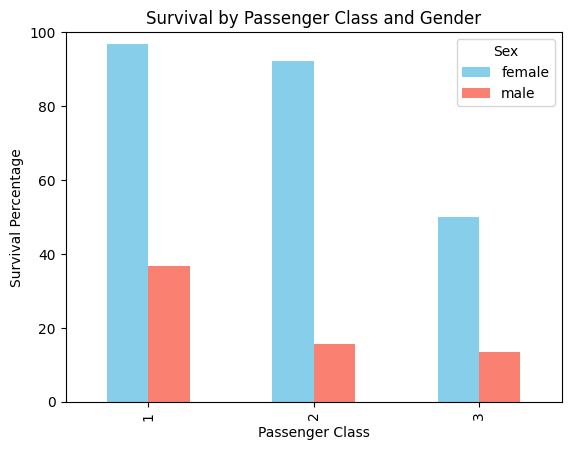

In [3]:
# Calculate survival rate by class and gender
survival_by_class_gender = data.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack() * 100

plt.figure()
survival_by_class_gender.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Survival by Passenger Class and Gender")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Percentage")
plt.ylim(0, 100)
plt.legend(title='Sex')
plt.savefig('plots/survival_by_class.png')
plt.show()

/var/folders/d7/8nzf082n5858hhh5g_5w1s8m0000gn/T/ipykernel_53669/1536712241.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_gender = train_data_age.groupby(['AgeGroup', 'Sex'])['Survived'].mean().unstack() * 100


<Figure size 640x480 with 0 Axes>

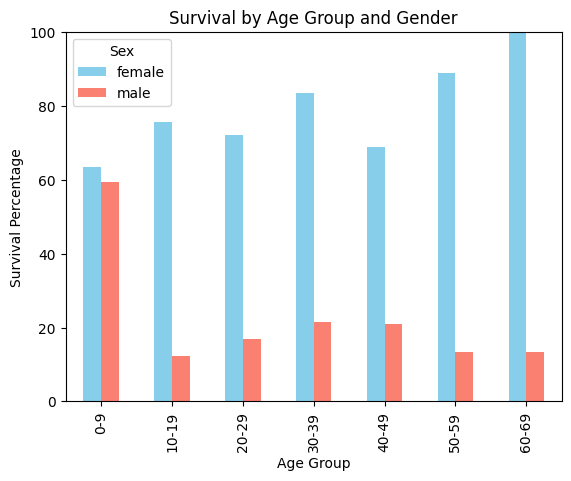

In [4]:
# Calculate survival rate by age group and gender
age_bins = [0, 10, 20, 30, 40, 50, 60, 70]
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69']
train_data_age = data.dropna(subset=['Age']).copy()
train_data_age['AgeGroup'] = pd.cut(train_data_age['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by AgeGroup and Sex, then calculate mean survival rate
survival_by_age_gender = train_data_age.groupby(['AgeGroup', 'Sex'])['Survived'].mean().unstack() * 100

plt.figure()
survival_by_age_gender.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Survival by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Survival Percentage")
plt.ylim(0, 100)
plt.legend(title='Sex')
plt.savefig('plots/survival_by_age.png')
plt.show()

Survival rate: 38.38% from 891 passengers, 342 survived
Of them 31.87% men, 68.13% women survived


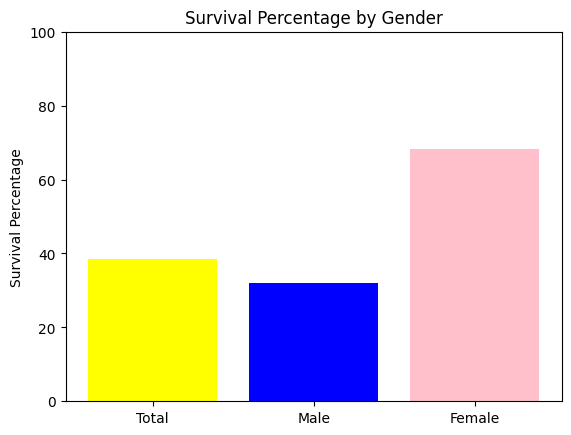

In [5]:
total_survivals = data['Survived'].sum()
survival_rate = data['Survived'].mean() * 100
print(f"Survival rate: {survival_rate:.2f}% from {len(data)} passengers, {total_survivals} survived")
survivors = data[data['Survived'] == 1]
male_survivors = (survivors['Sex'] == 'male').sum()
female_survivors = (survivors['Sex'] == 'female').sum()
total_survivors = survivors.shape[0]
male_percent = male_survivors / total_survivors * 100
female_percent = female_survivors / total_survivors * 100
print(f"Of them {male_percent:.2f}% men, {female_percent:.2f}% women survived")

# Plot this data
plt.figure()
plt.bar(['Total', 'Male', 'Female'], [survival_rate, male_percent, female_percent], color=['yellow', 'blue', 'pink'])
plt.title("Survival Percentage by Gender")
plt.ylabel("Survival Percentage")
plt.ylim(0, 100)
plt.savefig('plots/survival_by_gender.png')
plt.show()